In [1]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import cv2
except Exception as e:
    print("Importing Error: {}".format(e))

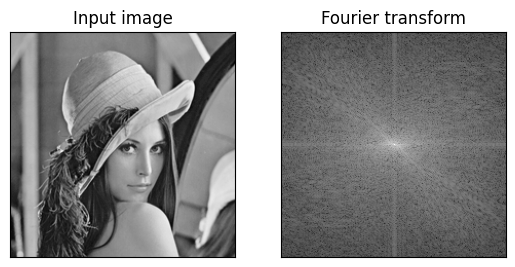

In [7]:
image = cv2.imread("../images/lenna.png", cv2.IMREAD_GRAYSCALE)

# Fourier transform
f_transform = np.fft.fft2(image)

# shift
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the abstract value
f_transform_magnitude = np.abs(f_transform_shifted)

# Get the Logarithm
f_transform_log = np.log(f_transform_magnitude + 1)  # add +1, prevents division by 0 error

# Draw the plot
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(f_transform_log, cmap='gray')
plt.title('Fourier transform'), plt.xticks([]), plt.yticks([])

plt.show()